<a href="https://colab.research.google.com/github/rdemarqui/studies/blob/master/Central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central limit theorem

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)

## Creating data

In [5]:
# Setting up some paramaters
scale_range = [0, 100]
min_sample = 0
max_sample = 100

In [32]:
# Creating random data distribution
list_numbers = []
for scale in list(range(scale_range[0], scale_range[1])):
  temp_data = [scale] * random.randint(min_sample, max_sample)
  list_numbers += temp_data

df = pd.DataFrame(list_numbers, columns=['values'])

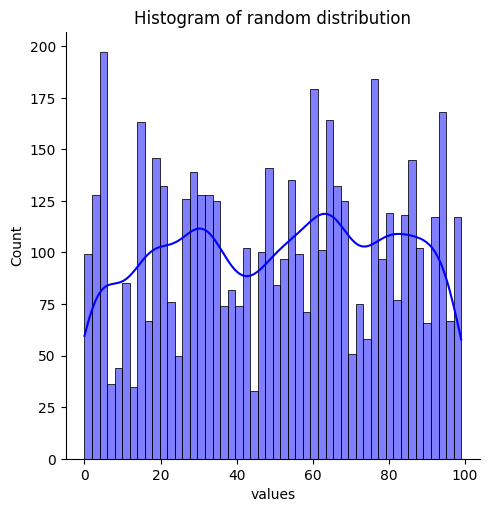

In [48]:
# Plotting distribution
sns.displot(df['values'], bins=50, kde=True, color='blue')
plt.title('Histogram of random distribution');